https://tadaoyamaoka.hatenablog.com/entry/2016/08/28/114423

In [9]:
import numpy as np
import matplotlib.pyplot as plt
fs = 44100
size = 4096
t = np.arange(0, size) / fs
frq = np.fft.fftfreq(size, 1/fs)

%matplotlib inline

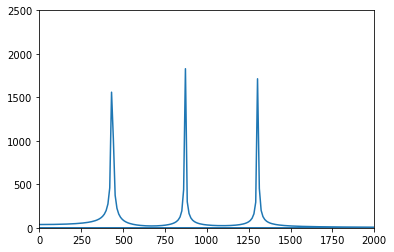

In [5]:
# 435Hzでは2倍音がピークになっている。次に高いピークは3倍音で、基本周波数のピークが一番低い値になっている。

f = 435
y = np.sin(2 * np.pi * f * t) + np.sin(2 * np.pi * 2 * f * t) * 0.95 + np.sin(2 * np.pi * 3 * f * t) * 0.9
Y = np.fft.fft(y)
plt.plot(frq, abs(Y))
plt.axis([0, 2000, 0, 2500])
plt.show()

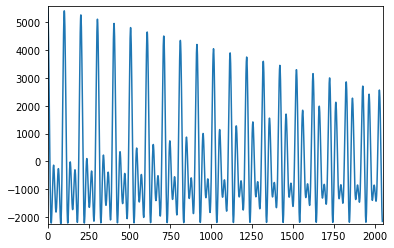

In [16]:
# 周期性のあるデータの場合は、自己相関関数も周期的な関数となる。
# パワースペクトルを逆フーリエ変換することで高速に計算できる。

acf = np.fft.ifft(abs(Y)**2)
acf_array = np.asarray(acf)[0:int(size/2)]
plt.plot(acf_array)
plt.axis([0, size/2, min(acf), max(acf)])
plt.show()

In [25]:
#ピークピッキング
def pick_peak(data):
	peaks_val = []
	peaks_index = []
	for i in range(2, data.size):
		if data[i-1] >= data[i-2] and data[i] < data[i-1]:
			peaks_val.append(data[i-1])
			peaks_index.append(i-1)
	max_index = peaks_val.index(max(peaks_val))
	return peaks_index[max_index]

In [26]:
n = pick_peak(acf_array)
f0 = fs/n

f0

436.63366336633663